In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

def save_data(X : pd.DataFrame, path:str):
    X.to_csv(path+".csv")
    X.to_excel(path+".xlsx")

In [19]:
select_columns = list(pd.read_csv("Datas/Stats/clustercenters.csv").columns)
select_columns

["('N', 'H', 1)",
 "('N', 'C', 1)",
 "('N', 'C', 1.5)",
 "('C', 'C', 1)",
 "('O', 'C', 2)",
 "('C', 'H', 1)"]

In [20]:
df = pd.read_csv("Datas/encoded_data.csv")
df.drop_duplicates(inplace=True)
df = df[select_columns]
df.head()

,"('N', 'H', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('C', 'C', 1)","('O', 'C', 2)","('C', 'H', 1)"
0,1,1,0,12,0,17
1,1,2,0,7,0,21
2,4,3,0,9,0,16
3,2,3,0,7,0,23
4,1,1,1,9,0,16


[]

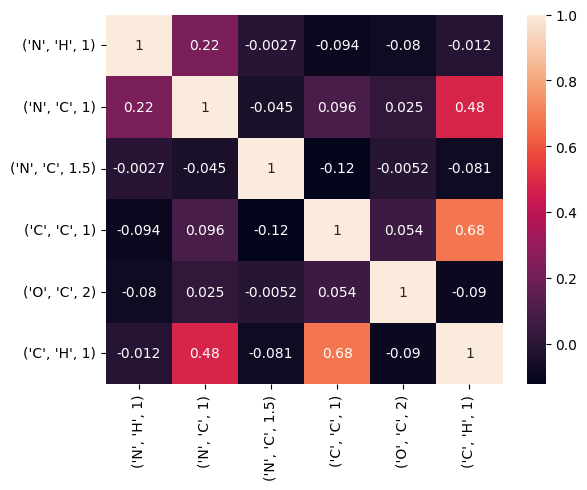

In [21]:
corr_df = df.corr()
save_data(corr_df, "Datas/correlation_data")
sns.heatmap(df.corr(), annot=True)
plt.savefig("Datas/Stats/correlation_heatmap.png")
plt.plot()

In [22]:
import os
import glob

files = glob.glob('Datas/Stats/Distribution/*')
for f in files:
    os.remove(f)
for columns in df.columns:
    bin = np.max(df[columns])
    sns.histplot(x = df[columns], kde=True, bins=bin)
    plt.savefig("Datas/Stats/Distribution/{}.png".format(columns))
    plt.clf()

<Figure size 640x480 with 0 Axes>